# Final results of Chapter 2
## Added 317 (Temperature before HE) feature to provide correlation between 317, ctf and dt2
## Added season (what time of year now), day_period (what is part of day now) feature to provide correlations for 327 (Temperature of air), 317 and dt
## HEs were considered as unit/whole part of cooling system so average temperatures (319 and 317) were taken to get dt2
## The training data given in a following boundaries [17-10-2022 -- 14-04-2023] so ML model predicts not wel if given t of air higher than 10 degree of celcium

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-21","2023-03-24"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14")
]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [6]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [7]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates

In [9]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("archive/P1_second_circuit_data_171022_to_140423.csv")
df_refacP2 = CsvRefactorer.read_csv("archive/P2_second_circuit_data_171022_to_140423.csv")

In [10]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

In [11]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

In [12]:
group1 = df_refacP1.min_frac_groupby(10, *ids1_array)
group2 = df_refacP2.min_frac_groupby(10, *ids2_array)

In [13]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

In [14]:
df = pd.concat([df1, df2], axis=1)

In [15]:
df.loc["2022-11-22":"2022-11-25"].describe()

,309,317,319,325,327,381,395,396,481,406,407,408,409,460,461,462,463
count,407.000000,449.000000,428.000000,438.000000,428.000000,171.000000,289.000000,218.000000,434.000000,441.000000,445.000000,472.000000,448.000000,472.000000,472.000000,472.000000,470.000000
mean,0.438371,22.223167,28.720109,28.280799,-18.503528,1.010724,42.091313,1.676615,689.478026,139.498252,133.676364,0.297393,131.396809,28.022737,29.677123,28.300296,27.595627
std,0.026038,2.735529,3.019185,3.054774,4.962238,0.984480,39.208850,1.258809,20.101627,17.843217,21.164543,0.025568,23.321815,3.135167,3.514750,3.187264,2.293371
min,0.010000,7.000000,8.555556,10.666667,-25.955263,0.002704,0.003241,0.001652,354.200000,0.039158,0.001903,0.207408,0.021397,9.788946,10.555607,10.048674,23.128407
25%,0.440000,21.100000,27.800000,27.397580,-22.478717,0.095315,1.502284,0.206459,685.737500,139.751554,134.748370,0.280837,133.816191,27.158465,28.991814,27.418669,26.285947
50%,0.440000,22.054546,28.600000,28.241572,-18.592402,0.617828,78.193726,1.965454,688.637500,141.806106,137.118732,0.296955,135.502345,28.146520,30.003589,28.456217,28.285292
75%,0.440000,23.454545,30.040038,29.576847,-17.104642,2.102342,80.000727,2.838692,691.762500,143.525837,138.854576,0.314289,136.740182,29.368726,31.118303,29.634111,29.428405
max,0.446000,27.065625,33.284848,32.954286,-7.000000,2.860664,86.674924,3.460265,809.275000,151.257467,144.239183,0.380752,139.619000,32.904612,34.731346,33.193762,30.316097


In [16]:
# quick TCF categorizing ( set 0 or 1)

df[381] = np.where(df[381] > 20, 1, 0)
df[395] = np.where(df[395] > 20, 1, 0)
df[396] = np.where(df[396] > 20, 1, 0)

In [17]:
periods = df_refacP1.select_time_period(
    df,
    time_periods
)

In [18]:
periods

{'2022-10-17 2022-10-21':                       309   317   319        325       327  381  395  396  \
 Timestamp                                                                   
 2022-10-17 09:20:00  0.01  16.5  21.4  20.100000  4.200000    0    0    0   
 2022-10-17 09:30:00  0.01  16.5  21.4  20.090909  4.308333    0    0    0   
 2022-10-17 09:40:00  0.01  16.5  21.4  20.068421  4.388572    0    0    0   
 2022-10-17 09:50:00  0.01  16.5  21.4  20.030769  4.600000    0    0    0   
 2022-10-17 10:00:00  0.01  16.5  21.4  20.014286  4.768571    0    0    0   
 ...                   ...   ...   ...        ...       ...  ...  ...  ...   
 2022-10-21 23:10:00  0.00   0.0   0.0   0.000000  0.000000    0    0    0   
 2022-10-21 23:20:00  0.00   0.0   0.0   0.000000  0.000000    0    0    0   
 2022-10-21 23:30:00  0.00   0.0   0.0   0.000000  0.000000    0    0    0   
 2022-10-21 23:40:00  0.00   0.0   0.0   0.000000  0.000000    0    0    0   
 2022-10-21 23:50:00  0.00   0.0   0.0 

In [32]:
wfr_anal = WaterFlowRates(0.1)

In [33]:
periods_ftrd = {}

for i in periods.keys():
    periods_ftrd[i], _ = wfr_anal.df_md_filter(periods[i], 481)

In [34]:
# quick NaN handling

for i in periods.keys():
    periods_ftrd[i] = periods_ftrd[i].fillna(0.0)
    zero_pressure = periods_ftrd[i][periods_ftrd[i][309] == 0.0].index
    zero_currents = periods_ftrd[i][
        (periods_ftrd[i][406] == 0.0) &
        (periods_ftrd[i][407] == 0.0) &
        (periods_ftrd[i][408] == 0.0) &
        (periods_ftrd[i][409] == 0.0)
    ].index
    # drop rows where pressure is nill
    periods_ftrd[i] = periods_ftrd[i].drop(index=zero_pressure)
    periods_ftrd[i] = periods_ftrd[i].drop(index=zero_currents)
    

In [35]:
periods_ftrd

{'2022-10-17 2022-10-21':                           309        317        319        325        327  \
 Timestamp                                                                   
 2022-10-17 14:10:00  0.190000  14.694286  18.942857  17.117143  10.690909   
 2022-10-17 15:10:00  0.450000  14.353125  16.441667  16.337838   9.247222   
 2022-10-17 15:20:00  0.450000  14.747059  17.215789  17.100000   9.481579   
 2022-10-17 15:30:00  0.450000  15.345946  18.567500  18.510000   9.726316   
 2022-10-17 15:40:00  0.450000  16.150000  20.095000  19.945000   9.594286   
 ...                       ...        ...        ...        ...        ...   
 2022-10-21 18:50:00  0.450000  20.987879  27.696970  27.300000   6.139394   
 2022-10-21 19:00:00  0.451538  20.538889  25.662500  25.040000   6.163636   
 2022-10-21 19:10:00  0.452941  19.794737  23.000000  22.575000   6.272973   
 2022-10-21 19:20:00  0.454400  18.673684  20.967500  20.625000   6.305128   
 2022-10-21 19:30:00  0.400333  17.5717

In [36]:
# TO get right Imean the following approach suggested
for i in periods.keys():
    
    try:
        periods_ftrd[i]["I2mean"] = periods_ftrd[i].loc[:, [406, 407, 408, 409]].sum(axis=1)/3
        
        # drop 406,407,408,409
        periods_ftrd[i] = periods_ftrd[i].drop([406, 407, 408, 409], axis=1)
    except KeyError:
        print("Some of cols have been dropped already")
    print(periods_ftrd[i])

                          309        317        319        325        327  \
Timestamp                                                                   
2022-10-17 14:10:00  0.190000  14.694286  18.942857  17.117143  10.690909   
2022-10-17 15:10:00  0.450000  14.353125  16.441667  16.337838   9.247222   
2022-10-17 15:20:00  0.450000  14.747059  17.215789  17.100000   9.481579   
2022-10-17 15:30:00  0.450000  15.345946  18.567500  18.510000   9.726316   
2022-10-17 15:40:00  0.450000  16.150000  20.095000  19.945000   9.594286   
...                       ...        ...        ...        ...        ...   
2022-10-21 18:50:00  0.450000  20.987879  27.696970  27.300000   6.139394   
2022-10-21 19:00:00  0.451538  20.538889  25.662500  25.040000   6.163636   
2022-10-21 19:10:00  0.452941  19.794737  23.000000  22.575000   6.272973   
2022-10-21 19:20:00  0.454400  18.673684  20.967500  20.625000   6.305128   
2022-10-21 19:30:00  0.400333  17.571795  19.028205  18.637500   6.263158   

In [37]:
# Noimalize Q by P and Imean
for i in periods.keys():
    
    try:
        # QbyIP units are m3/h/MPa/A
        periods_ftrd[i]["QbyIP"] = periods_ftrd[i][481]/(periods_ftrd[i][309]*periods_ftrd[i]["I2mean"])
        periods_ftrd[i]["QbyI"] = periods_ftrd[i][481]/(periods_ftrd[i]["I2mean"])
        # drop 406,407,408,409
#         periods_ftrd[i] = periods_ftrd[i].drop([481, 309, "I2mean"], axis=1)
    except KeyError:
        print("Some of cols have been dropped already")
    print(periods_ftrd[i])

                           317        319        325        327  381  395  \
Timestamp                                                                   
2022-10-17 14:10:00  14.694286  18.942857  17.117143  10.690909    0    0   
2022-10-17 15:10:00  14.353125  16.441667  16.337838   9.247222    0    0   
2022-10-17 15:20:00  14.747059  17.215789  17.100000   9.481579    0    0   
2022-10-17 15:30:00  15.345946  18.567500  18.510000   9.726316    0    0   
2022-10-17 15:40:00  16.150000  20.095000  19.945000   9.594286    0    0   
...                        ...        ...        ...        ...  ...  ...   
2022-10-21 18:50:00  20.987879  27.696970  27.300000   6.139394    1    1   
2022-10-21 19:00:00  20.538889  25.662500  25.040000   6.163636    1    1   
2022-10-21 19:10:00  19.794737  23.000000  22.575000   6.272973    1    1   
2022-10-21 19:20:00  18.673684  20.967500  20.625000   6.305128    1    1   
2022-10-21 19:30:00  17.571795  19.028205  18.637500   6.263158    1    1   

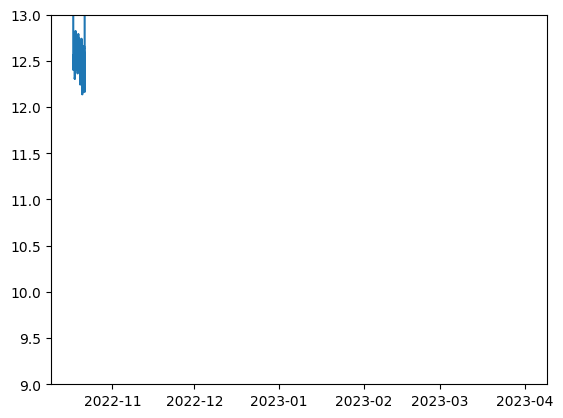

In [39]:
# quick view of df

for i in periods_ftrd.keys():
#     plt.plot(periods_ftrd[i]["QbyIP"])
    plt.plot(periods_ftrd[i]["QbyIP"])
    plt.ylim(9,13)

In [22]:
# try to apply double filtering

for i in periods_ftrd.keys():
    periods_ftrd[i], _ = wfr_anal.df_md_filter(periods_ftrd[i], "QbyIP")

In [23]:
print(periods_ftrd)

{'2022-10-17 2022-10-21':                            317        319        325       327  381  395  396  \
Timestamp                                                                       
2022-10-17 15:10:00  14.353125  16.441667  16.337838  9.247222    0    0    0   
2022-10-17 15:20:00  14.747059  17.215789  17.100000  9.481579    0    0    0   
2022-10-17 15:30:00  15.345946  18.567500  18.510000  9.726316    0    0    0   
2022-10-17 15:40:00  16.150000  20.095000  19.945000  9.594286    0    0    0   
2022-10-17 15:50:00  17.255000  21.485000  21.322500  9.352778    0    0    0   
...                        ...        ...        ...       ...  ...  ...  ...   
2022-10-21 18:40:00  21.530555  28.265714  27.854054  6.234286    1    1    1   
2022-10-21 18:50:00  20.987879  27.696970  27.300000  6.139394    1    1    1   
2022-10-21 19:00:00  20.538889  25.662500  25.040000  6.163636    1    1    1   
2022-10-21 19:10:00  19.794737  23.000000  22.575000  6.272973    1    1    1   
20

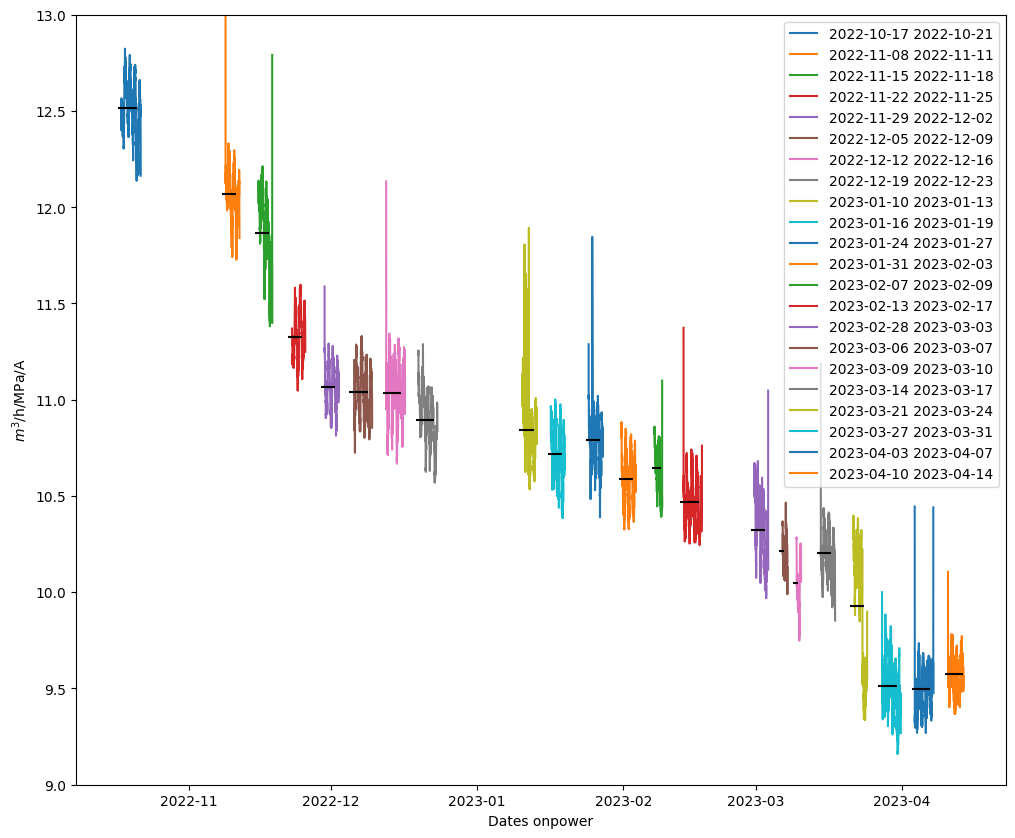

In [24]:
# new quick view of df
plt.figure(figsize = (12,10))

for n, i in enumerate(periods_ftrd.keys()):
    
    s,f = list(periods_ftrd.keys())[n].split(" ")
    plt.plot(periods_ftrd[i]["QbyIP"], label=i)
    q_mean = periods_ftrd[i]["QbyIP"].mean()
    plt.hlines(q_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
    plt.xlabel("Dates onpower")
    plt.ylabel("$m^3$/h/MPa/A")
    plt.legend()
    plt.ylim(9,13)

In [25]:
# to make clear dataset extra data engineering steps are required
# 1 - temporary drop temperature on each HE
# 2 - get delta t on second circuit

# 1 step
t_on_HE = {}

for i in periods_ftrd.keys():
    
    try:
        t_on_HE[i] = periods_ftrd[i].loc[:, [325, 460, 461, 462, 463]]
        periods_ftrd[i] = periods_ftrd[i].drop([325, 460, 461, 462, 463], axis=1)
        
    except KeyError:
        print("Some of cols have been dropped already")




In [26]:
# 2 step

for i in periods_ftrd.keys():
    
    try:
        periods_ftrd[i]["dt2"] = periods_ftrd[i][319] - periods_ftrd[i][317]
        periods_ftrd[i] = periods_ftrd[i].drop([319], axis=1)
        
    except KeyError:
        print("Some of cols have been dropped already")

In [27]:
periods_ftrd

{'2022-10-17 2022-10-21':                            317       327  381  395  396      QbyIP      QbyI  \
 Timestamp                                                                      
 2022-10-17 15:10:00  14.353125  9.247222    0    0    0  12.402024  5.580911   
 2022-10-17 15:20:00  14.747059  9.481579    0    0    0  12.415593  5.587017   
 2022-10-17 15:30:00  15.345946  9.726316    0    0    0  12.469533  5.611290   
 2022-10-17 15:40:00  16.150000  9.594286    0    0    0  12.483268  5.617471   
 2022-10-17 15:50:00  17.255000  9.352778    0    0    0  12.508822  5.628970   
 ...                        ...       ...  ...  ...  ...        ...       ...   
 2022-10-21 18:40:00  21.530555  6.234286    1    1    1  12.457529  5.605888   
 2022-10-21 18:50:00  20.987879  6.139394    1    1    1  12.441285  5.598578   
 2022-10-21 19:00:00  20.538889  6.163636    1    1    1  12.348984  5.576041   
 2022-10-21 19:10:00  19.794737  6.272973    1    1    1  12.266097  5.555820   
 20

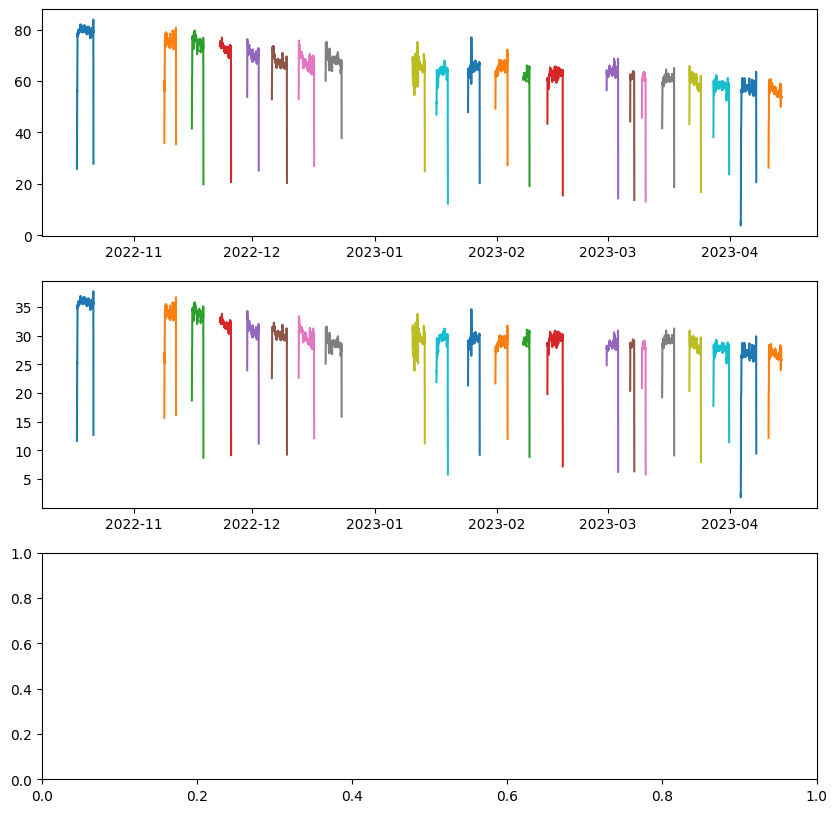

In [28]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

for i in periods_ftrd.keys():
    axs[0].plot(periods_ftrd[i]["QbyIP"]*periods_ftrd[i]["dt2"])
    axs[1].plot(periods_ftrd[i]["QbyI"]*periods_ftrd[i]["dt2"])
#     plt.ylim(9,13)

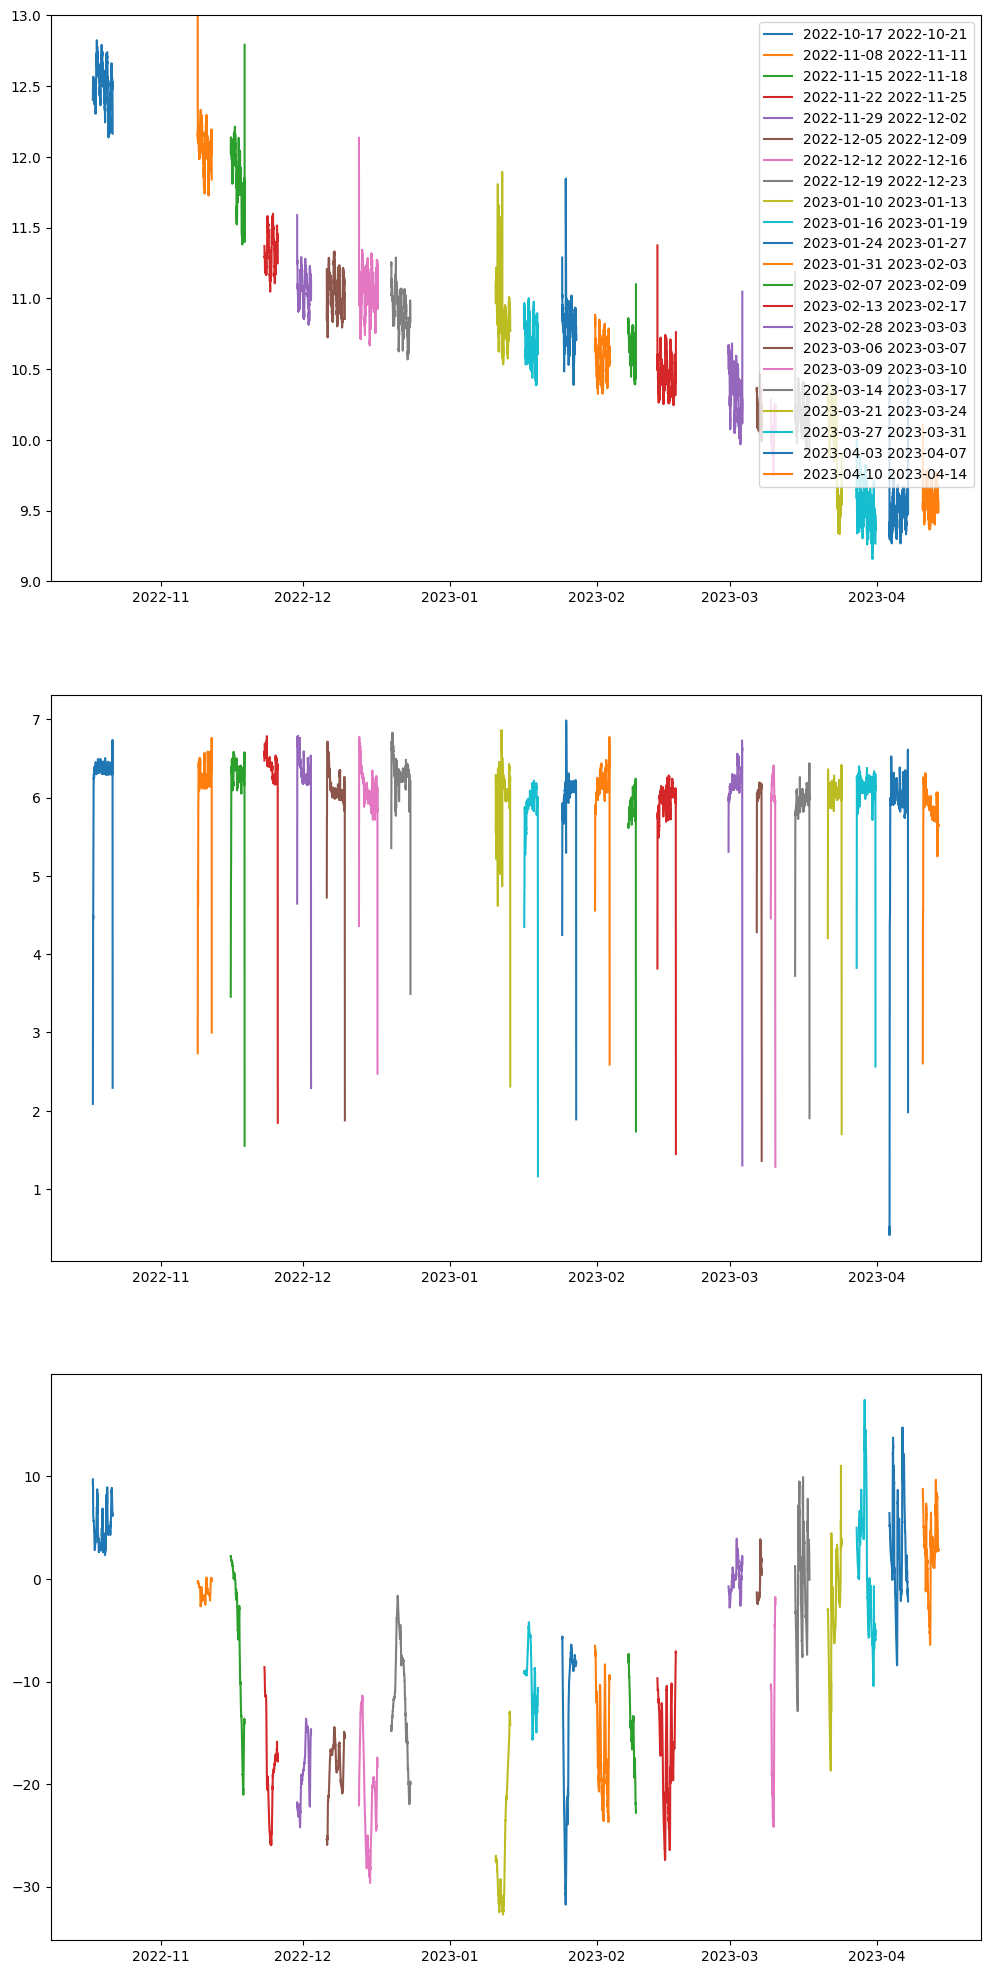

In [29]:
# new quick view of df
fig, axs = plt.subplots(3,1, figsize = (12,25))

for n, i in enumerate(periods_ftrd.keys()):
    
    
    axs[0].plot(periods_ftrd[i]["QbyIP"], label=i)
    axs[0].legend()
    axs[0].set_ylim(9,13)
    
    axs[1].plot(periods_ftrd[i]["dt2"])
    
    axs[2].plot(periods_ftrd[i][327])

In [30]:
# from figs above the follwoing can be concluded:
# - dt on HEs has high dispersion at the start and finish of weekly cycle, so better to filter dataframes 
# by this parameter

# SO here we are trying to predict dt2 so high dispersion of dt better to reduce by extra filter session
from analytics import WaterTemperatures
wt = WaterTemperatures(0.2)

for i in periods.keys():
    periods_ftrd[i], _ = wt.df_md_filter(periods_ftrd[i], "dt2")

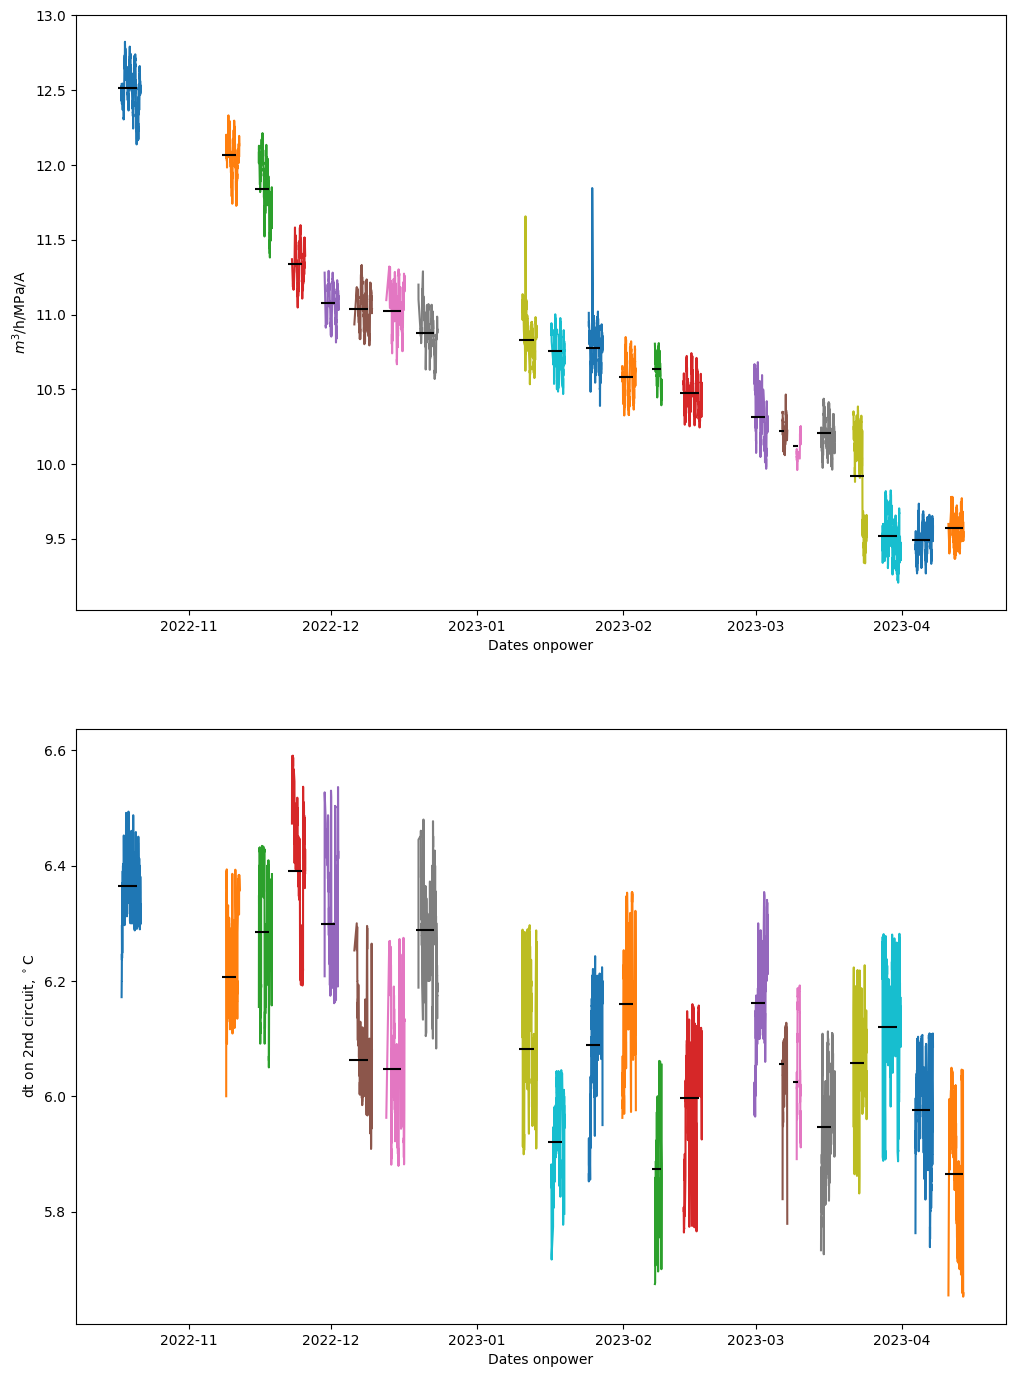

In [31]:
# new quick view of df
fig, axs = plt.subplots(2,1, figsize = (12,17))

for n, i in enumerate(periods_ftrd.keys()):
    s,f = list(periods_ftrd.keys())[n].split(" ")
    q_mean = periods_ftrd[i]["QbyIP"].mean()
    dt_mean = periods_ftrd[i]["dt2"].mean()
    
    
    axs[0].plot(periods_ftrd[i]["QbyIP"], label=i)
    axs[0].hlines(q_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
#     axs[0].set_ylim(9,13)
    axs[0].set_xlabel("Dates onpower")
    axs[0].set_ylabel("$m^3$/h/MPa/A")
#     axs[0].legend()
    
    axs[1].plot(periods_ftrd[i]["dt2"])
    axs[1].hlines(dt_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
    axs[1].set_xlabel("Dates onpower")
    axs[1].set_ylabel("dt on 2nd circuit, $^\circ$C")
    
#     axs[2].plot(periods_ftrd[i][327])
    
#     axs[3].plot(periods_ftrd[i][381])
    

In [32]:
# interesting note
# The dt is almost the same for every week on power
# But if the Q decreasing due to flouring/ effeciency drop of HE
# How to sustain the same dt? Probably by frequent enabling of CTF???
# just lets count how many time CTF were enabled for each week

for n, i in enumerate(periods_ftrd.keys()):
    print(periods_ftrd[i].loc[:, [381, 395, 396]].value_counts())


381  395  396
1    1    0      575
dtype: int64
381  395  396
0    1    0      274
1    1    0       36
dtype: int64
381  395  396
0    1    0      162
     0    0       96
1    1    0       82
dtype: int64
381  395  396
0    0    0      248
     1    0       97
dtype: int64
381  395  396
0    0    0      272
     1    0       45
1    0    1        3
     1    1        1
dtype: int64
381  395  396
0    0    0      412
     1    0       22
dtype: int64
381  395  396
0    0    0      242
     1    0      114
dtype: int64
381  395  396
1    1    0      258
0    1    1      100
          0       80
1    1    1        6
0    0    0        2
dtype: int64
381  395  396
0    0    0      276
     1    0       11
1    1    0        2
dtype: int64
381  395  396
0    1    0      175
     0    0       83
dtype: int64
381  395  396
0    1    0      240
     0    0      121
dtype: int64
381  395  396
0    0    0      240
     1    0      108
          1        1
dtype: int64
381  395  396
0    1    0

In [33]:
# adds new column - time_on_power
first_point = 0

for n, i in enumerate(periods_ftrd.keys()):
    tot = periods_ftrd[i].index[-1] - periods_ftrd[i].index[0]
    onpower = tot.days*24 + tot.seconds/3600
    
    step = onpower/len(periods_ftrd[i])
#     first_point += step
    
    print("tot length: ", onpower + first_point, "step width: ", step)
    new_col = np.arange(
        start = first_point + step, 
        stop = onpower + first_point + step, 
        step = step
    )
    
    if not len(new_col) == len(periods_ftrd[i]):
        new_col = new_col[:-1]
    print("New column: ", new_col)
    
    first_point += onpower
    
    periods_ftrd[i]["time_on_power"] = new_col

tot length:  96.0 step width:  0.16695652173913045
New column:  [ 0.16695652  0.33391304  0.50086957  0.66782609  0.83478261  1.00173913
  1.16869565  1.33565217  1.5026087   1.66956522  1.83652174  2.00347826
  2.17043478  2.3373913   2.50434783  2.67130435  2.83826087  3.00521739
  3.17217391  3.33913043  3.50608696  3.67304348  3.84        4.00695652
  4.17391304  4.34086957  4.50782609  4.67478261  4.84173913  5.00869565
  5.17565217  5.3426087   5.50956522  5.67652174  5.84347826  6.01043478
  6.1773913   6.34434783  6.51130435  6.67826087  6.84521739  7.01217391
  7.17913043  7.34608696  7.51304348  7.68        7.84695652  8.01391304
  8.18086957  8.34782609  8.51478261  8.68173913  8.84869565  9.01565217
  9.1826087   9.34956522  9.51652174  9.68347826  9.85043478 10.0173913
 10.18434783 10.35130435 10.51826087 10.68521739 10.85217391 11.01913043
 11.18608696 11.35304348 11.52       11.68695652 11.85391304 12.02086957
 12.18782609 12.35478261 12.52173913 12.68869565 12.85565217 

In [34]:
# makes a new copy of periods_ftrd and transofrm it to a single df

df_raw = pd.concat(periods_ftrd.values())

In [35]:
import seaborn as sns

In [36]:
df_raw

,317,327,381,395,396,QbyIP,QbyI,dt2,time_on_power
Timestamp,,,,,,,,,
2022-10-17 18:10:00,23.518750,5.851351,1,1,0,12.539633,5.642834,6.171875,0.166957
2022-10-17 18:20:00,23.396666,5.780556,1,1,0,12.426728,5.592027,6.187709,0.333913
2022-10-17 18:30:00,23.303225,5.681579,1,1,0,12.515100,5.631795,6.200001,0.500870
2022-10-17 18:40:00,23.299999,5.674286,1,1,0,12.511896,5.630353,6.196775,0.667826
2022-10-17 18:50:00,23.299999,5.631579,1,1,0,12.530030,5.638513,6.200001,0.834783
...,...,...,...,...,...,...,...,...,...
2023-04-13 22:10:00,25.308823,3.169231,0,1,0,9.573110,4.595093,5.682086,1557.710708
2023-04-13 22:20:00,25.590625,2.961111,0,1,0,9.598048,4.607063,5.673891,1557.908031
2023-04-13 22:30:00,25.826470,2.972973,0,1,0,9.613842,4.614644,5.652317,1558.105354


0.9285772722652282


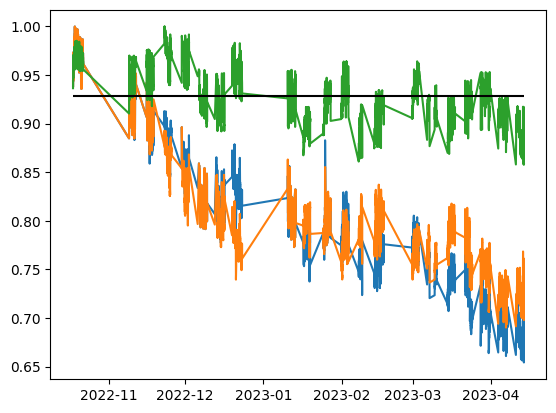

In [37]:
# blue one show the flouring cuz takes into account the pressure --> linear dependence 
# if the coefficient of pump efficieny adds to blue curve the linear dependence will be much more clear
# orange one describes dependence from I only

plt.plot(df_raw.index, df_raw["QbyIP"]*df_raw["dt2"]/(df_raw["QbyIP"]*df_raw["dt2"]).max())
plt.plot(df_raw.index, df_raw["QbyI"]*df_raw["dt2"]/(df_raw["QbyI"]*df_raw["dt2"]).max())
plt.plot(df_raw.index, df_raw["dt2"]/df_raw["dt2"].max())
plt.hlines((df_raw["dt2"]/df_raw["dt2"].max()).mean(), df_raw.index[0], df_raw.index[-1],  color="black")
print((df_raw["dt2"]/df_raw["dt2"].max()).mean())

In [39]:
# from preprocessing import DataPreprocess

In [40]:
def season_mapping(month: int):
    if month in [12,1,2]:
        return 0
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 1

In [41]:
def day_period_mapping(hour: int):
    if hour in [21,22,23,0,1,2,3,4,5,6,7,8]:
        return 0
    elif hour in [9,10,11,12,13,14,15,16,17,18,19,20]:
        return 1
#     if hour in [0,1,2,3,4,5]:
#         return 0
#     elif hour in [6,7,8,9,10,11]:
#         return 1
#     elif hour in [12,13,14,15,16,17]:
#         return 2
#     elif hour in [18,19,20,21,22, 23]:
#         return 3

In [42]:
def sin_transformer(val, period):
    return np.sin(val / period * 2 * np.pi)


def cos_transformer(val, period):
    return np.cos(val / period * 2 * np.pi)

In [43]:
dp = DataPreprocess()
# timestamp = df_raw.index
df_raw = df_raw.reset_index()
df_raw["season"] = pd.Series(
        list(map(season_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "month")))
    )


# df_raw["hour"] = dp.retrieve_datatime(df_raw["Timestamp"], "hour")
df_raw["day_period"] = pd.Series(
        list(map(day_period_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "hour")))
    )
# no correletion with sin/cos transormed labels
# df_raw["hour_sin"] = sin_transformer(h, 24)
# df_raw["hour_cos"] = cos_transformer(h, 24)

NameError: name 'DataPreprocess' is not defined

In [75]:
df_raw = df_raw.reset_index()
try:
    df_raw = df_raw.drop("Timestamp", axis=1)
except KeyError:
    print("Have Been Dropped Already")
df_raw

,317,327,381,395,396,QbyIP,QbyI,dt2,time_on_power
0,23.518750,5.851351,1,1,0,12.539633,5.642834,6.171875,0.166957
1,23.396666,5.780556,1,1,0,12.426728,5.592027,6.187709,0.333913
2,23.303225,5.681579,1,1,0,12.515100,5.631795,6.200001,0.500870
3,23.299999,5.674286,1,1,0,12.511896,5.630353,6.196775,0.667826
4,23.299999,5.631579,1,1,0,12.530030,5.638513,6.200001,0.834783
...,...,...,...,...,...,...,...,...,...
7573,25.308823,3.169231,0,1,0,9.573110,4.595093,5.682086,1557.710708
7574,25.590625,2.961111,0,1,0,9.598048,4.607063,5.673891,1557.908031
7575,25.826470,2.972973,0,1,0,9.613842,4.614644,5.652317,1558.105354
7576,26.700001,2.877778,0,1,0,9.486647,4.553591,5.654838,1558.302677


<AxesSubplot: >

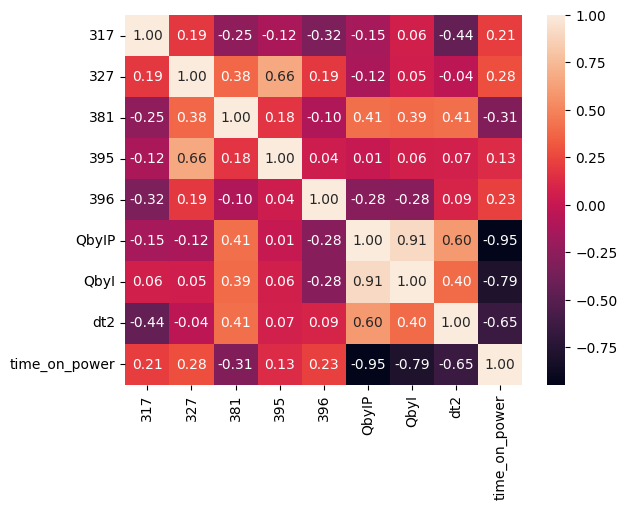

In [76]:
sns.heatmap(df_raw.corr(), annot=True, fmt=".2f")

# Important note - After 317 (Temperature before HE) was added to other data
## Correletaion between ctf and 317 is observed that means that if 317 rises one of ctf swithces on to stop rising
## 317 has expected correlation with dt2 so it's a good sign
## 317 has expected correlation with season and 327 (Temperature of air)
## 381, 395, 396 has expected correlation with season and dt 

In [47]:
old_cols = df_raw.columns
new_cols = list(map(lambda x: str(x), old_cols))
dict_new_cols = {}
for n in range(len(old_cols)):
    dict_new_cols[old_cols[n]] = new_cols[n]
    
df_raw = df_raw.rename(columns=dict_new_cols)

In [48]:
df_raw.columns

Index(['317', '327', '381', '395', '396', 'QbyIP', 'QbyI', 'dt2',
       'time_on_power'],
      dtype='object')

# Finally only 11 columns left among which are: 
# '317', 327', '381', '395', '396', 'QbyIP', 'dt2', 'time_on_power', 'season',
# day_period
## Aim column is dt2

In [77]:
df_to_prep = df_raw.copy()
y = df_to_prep["dt2"] #.to_numpy().reshape(-1)
X_raw = df_to_prep.drop(["dt2"], axis=1)
    
X_raw

,317,327,381,395,396,QbyIP,QbyI,time_on_power
0,23.518750,5.851351,1,1,0,12.539633,5.642834,0.166957
1,23.396666,5.780556,1,1,0,12.426728,5.592027,0.333913
2,23.303225,5.681579,1,1,0,12.515100,5.631795,0.500870
3,23.299999,5.674286,1,1,0,12.511896,5.630353,0.667826
4,23.299999,5.631579,1,1,0,12.530030,5.638513,0.834783
...,...,...,...,...,...,...,...,...
7573,25.308823,3.169231,0,1,0,9.573110,4.595093,1557.710708
7574,25.590625,2.961111,0,1,0,9.598048,4.607063,1557.908031
7575,25.826470,2.972973,0,1,0,9.613842,4.614644,1558.105354
7576,26.700001,2.877778,0,1,0,9.486647,4.553591,1558.302677


In [50]:
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [78]:
ct = ColumnTransformer(
    [
#         ("numerical", StandardScaler(), ["317", "327", "QbyIP", "QbyI", "time_on_power"]),
#         ("categorical", OneHotEncoder(), ["ct"])
    ],
    remainder = "passthrough"
)

In [79]:
# apply column transormer on X
X = ct.fit_transform(X_raw)

In [80]:
# X_raw["317norm"] = X[:, 0]

In [81]:
# plt.plot(X_raw["317"])
# plt.plot(X_raw["317norm"])

In [82]:
X.shape, y.shape

((7578, 8), (7578,))

<AxesSubplot: >

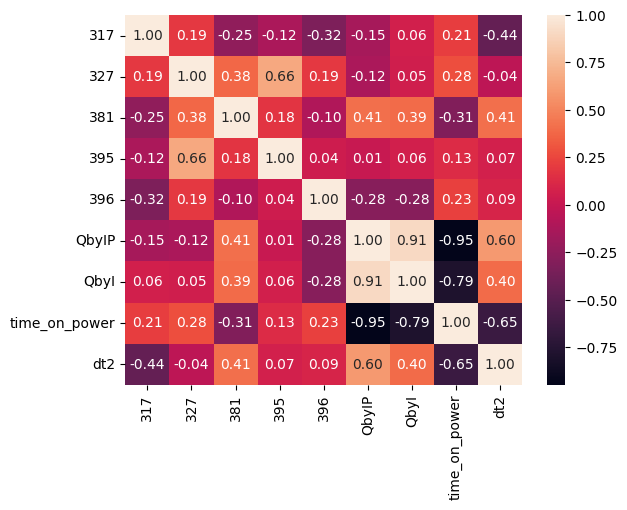

In [83]:
ctct = pd.concat(
        [
            X_raw, 
            y
        ], axis=1)
sns.heatmap(
    ctct.corr(),
    annot=True, fmt=".2f")

In [84]:
y = y.to_numpy()

# Next step is to apply some ML to prepared data

In [85]:
from sklearn.model_selection import TimeSeriesSplit, ShuffleSplit, KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.neural_network import MLPRegressor


In [86]:
def evaluate(model, X, y, cv):
#     print(X)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [87]:
models_list = ["KNeighbors_distance","GBR", "MLP", "GBR", "SGDR"]
models = [
    KNeighborsRegressor(n_neighbors=8, weights = 'distance'),
    GradientBoostingRegressor(learning_rate=0.5, n_estimators=64, max_depth=4),
    MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42),
    GradientBoostingRegressor(),
    SGDRegressor(max_iter=1000)
 ]

In [88]:
tscv = list(TimeSeriesSplit(n_splits=4).split(X, y))

In [89]:
for tr, te in tscv:
    print(tr, te)

[   0    1    2 ... 1515 1516 1517] [1518 1519 1520 ... 3030 3031 3032]
[   0    1    2 ... 3030 3031 3032] [3033 3034 3035 ... 4545 4546 4547]
[   0    1    2 ... 4545 4546 4547] [4548 4549 4550 ... 6060 6061 6062]
[   0    1    2 ... 6060 6061 6062] [6063 6064 6065 ... 7575 7576 7577]


In [90]:
from model import TrainModel

In [91]:
X.shape, y.shape

((7578, 8), (7578,))

In [92]:
tm = TrainModel(X, y)

In [93]:
tm.model_comparison(models_list, models, tscv)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.222 +/- 0.072
Root Mean Squared Error: 0.254 +/- 0.074

Evaluating of GBR
Mean Absolute Error:     0.164 +/- 0.068
Root Mean Squared Error: 0.197 +/- 0.075

Evaluating of MLP
Mean Absolute Error:     0.574 +/- 0.349
Root Mean Squared Error: 0.699 +/- 0.312

Evaluating of GBR
Mean Absolute Error:     0.165 +/- 0.045
Root Mean Squared Error: 0.192 +/- 0.043

Evaluating of SGDR
Mean Absolute Error:     154372566483394.688 +/- 184020404655333.312
Root Mean Squared Error: 154911819891513.469 +/- 184289120071346.656



In [94]:
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=128, max_depth=5)

In [95]:
gbr_preds = []

for tr, te in tscv:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

-1.6278222368352164
-0.22074547404580858
-1.1591248804969179
0.16779389739222494


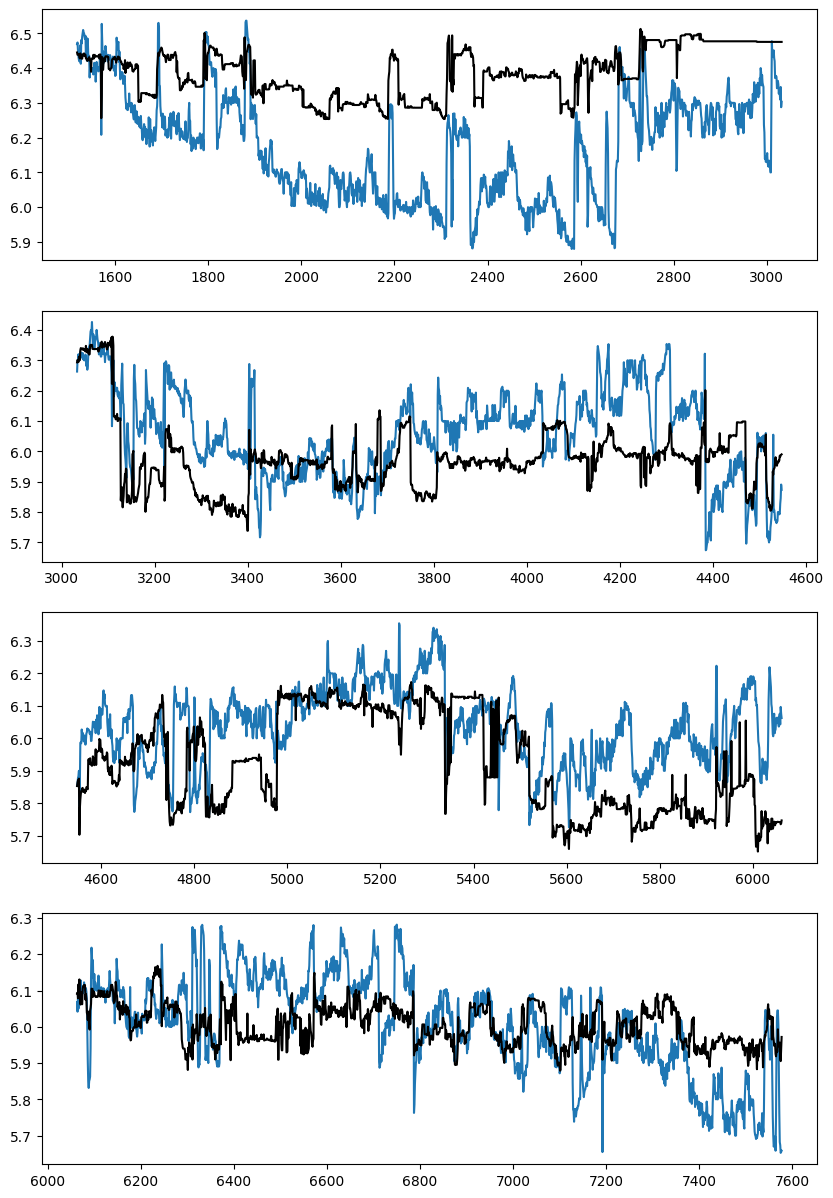

In [96]:
n = 0
fig, axs = plt.subplots(len(tscv), 1, figsize=(10,15))

for i in range(len(tscv)):

    axs[i].plot(tscv[i][1], y[tscv[i][1]])
    axs[i].plot(tscv[i][1], gbr_preds[i], color="black")

#     axs[1].plot(tscv[i][1], y[tscv[i][1]])
#     axs[1].plot(tscv[i][1], gbr_preds[i], color="black")


In [155]:
mlp = KNeighborsRegressor(n_neighbors=5, weights = 'distance')

In [156]:
mlp_preds = []

for tr, te in tscv:
    mlp.fit(X[tr], y[tr])
    mlp_preds.append(mlp.predict(X[te]))
    print(mlp.score(X[te], y[te]))

-1.6787536924676765
-0.7940866350299829
-0.7101017849680717
-1.3903486994884822


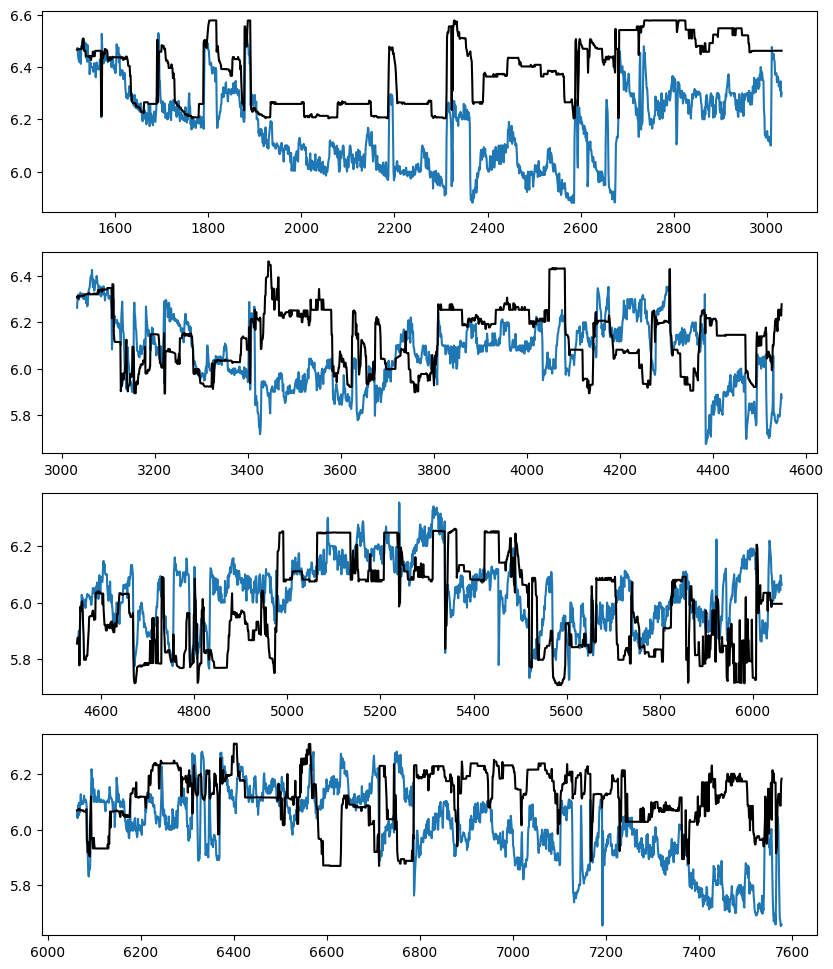

In [157]:
n = 0
fig, axs = plt.subplots(len(tscv), 1, figsize=(10,12))

for i in range(len(tscv)):

    axs[i].plot(tscv[i][1], y[tscv[i][1]])
    axs[i].plot(tscv[i][1], mlp_preds[i], color="black")

#     axs[1].plot(tscv[i][1], y[tscv[i][1]])
#     axs[1].plot(tscv[i][1], gbr_preds[i], color="black")

# There is high dispersion between to closest point on each step
# SMA teqnique is good approach to add a bit smoothness to a data

In [158]:
df_raw

,317,327,381,395,396,QbyIP,QbyI,dt2,time_on_power,season,day_period
0,23.518750,5.851351,1,1,0,12.539633,5.642834,6.171875,0.166957,1,1
1,23.396666,5.780556,1,1,0,12.426728,5.592027,6.187709,0.333913,1,1
2,23.303225,5.681579,1,1,0,12.515100,5.631795,6.200001,0.500870,1,1
3,23.299999,5.674286,1,1,0,12.511896,5.630353,6.196775,0.667826,1,1
4,23.299999,5.631579,1,1,0,12.530030,5.638513,6.200001,0.834783,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7573,25.308823,3.169231,0,1,0,9.573110,4.595093,5.682086,1557.710708,1,0
7574,25.590625,2.961111,0,1,0,9.598048,4.607063,5.673891,1557.908031,1,0
7575,25.826470,2.972973,0,1,0,9.613842,4.614644,5.652317,1558.105354,1,0
7576,26.700001,2.877778,0,1,0,9.486647,4.553591,5.654838,1558.302677,1,0


In [159]:
df_smooth = df_raw.copy()
# Timestamp can be dropped
# df_smooth = df_smooth.reset_index().drop("Timestamp", axis=1)
ct_col = pd.DataFrame([])
ct_col = df_smooth.loc[:, ["381", "395", "396", "season", "day_period"]]
df_smooth = df_smooth.drop(["381", "395", "396", "season", "day_period"], axis=1)

In [160]:
df_smooth

,317,327,QbyIP,QbyI,dt2,time_on_power
0,23.518750,5.851351,12.539633,5.642834,6.171875,0.166957
1,23.396666,5.780556,12.426728,5.592027,6.187709,0.333913
2,23.303225,5.681579,12.515100,5.631795,6.200001,0.500870
3,23.299999,5.674286,12.511896,5.630353,6.196775,0.667826
4,23.299999,5.631579,12.530030,5.638513,6.200001,0.834783
...,...,...,...,...,...,...
7573,25.308823,3.169231,9.573110,4.595093,5.682086,1557.710708
7574,25.590625,2.961111,9.598048,4.607063,5.673891,1557.908031
7575,25.826470,2.972973,9.613842,4.614644,5.652317,1558.105354
7576,26.700001,2.877778,9.486647,4.553591,5.654838,1558.302677


In [161]:
# Simple Moving Average - SMA
# We will take SMA of 10 points

st_ind, fn_ind = 0, 20
arr_smooth = np.array([])

for n in range(len(df_smooth)): # n starts from 0
#     if fn_ind + n == len(df_smooth):
#         break
    arr_smooth = np.append(
        arr_smooth, 
        df_smooth.iloc[st_ind + n: fn_ind + n].mean(axis=0))
    

In [162]:
arr_smooth = arr_smooth.reshape(len(df_smooth),len(df_smooth.columns))
arr_smooth

array([[  23.19286207,    5.4609843 ,   12.50851481,    5.62883151,
           6.23483181,    1.75304348],
       [  23.16368926,    5.40857802,   12.50779824,    5.62850906,
           6.24285569,    1.92      ],
       [  23.13917851,    5.3586931 ,   12.51367036,    5.63115151,
           6.24895415,    2.08695652],
       ...,
       [  26.48333342,    2.91786933,    9.54847263,    4.58326676,
           5.65514789, 1558.30267703],
       [  26.81176494,    2.8903175 ,    9.51578786,    4.56757807,
           5.65656313, 1558.40133851],
       [  26.92352912,    2.90285719,    9.5449285 ,    4.58156558,
           5.65828781, 1558.5       ]])

In [163]:
df_sma = pd.DataFrame([])
df_sma = pd.concat(
    [
        pd.DataFrame(data=arr_smooth[:-fn_ind], columns=df_smooth.columns),
        ct_col[:-fn_ind]
    ],
    axis=1
)

In [164]:
df_sma

,317,327,QbyIP,QbyI,dt2,time_on_power,381,395,396,season,day_period
0,23.192862,5.460984,12.508515,5.628832,6.234832,1.753043,1,1,0,1,1
1,23.163689,5.408578,12.507798,5.628509,6.242856,1.920000,1,1,0,1,1
2,23.139179,5.358693,12.513670,5.631152,6.248954,2.086957,1,1,0,1,1
3,23.119017,5.310069,12.513068,5.630880,6.253954,2.253913,1,1,0,1,1
4,23.097243,5.261960,12.510170,5.629576,6.260890,2.420870,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7553,24.703646,6.364985,9.566515,4.591450,5.850426,1555.638817,1,1,0,1,1
7554,24.822680,6.116396,9.566935,4.591651,5.836743,1555.836140,1,1,0,1,1
7555,24.964087,5.851118,9.572123,4.594142,5.822272,1556.033463,1,1,0,1,1
7556,25.124604,5.582413,9.574724,4.595390,5.804757,1556.230786,0,1,0,1,1


<AxesSubplot: >

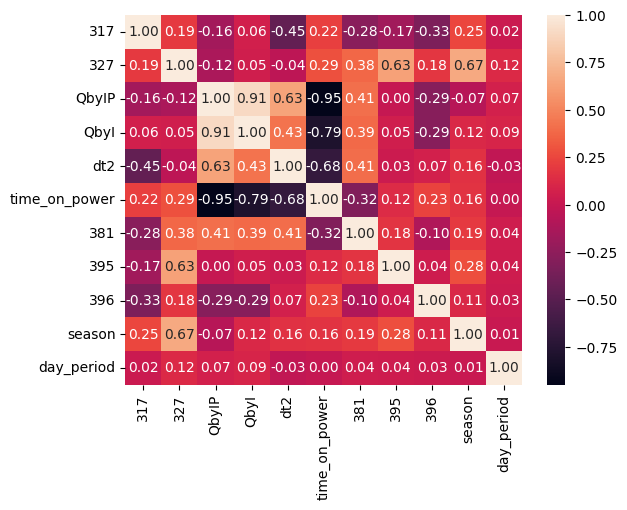

In [165]:
sns.heatmap(df_sma.corr(), annot=True, fmt=".2f")

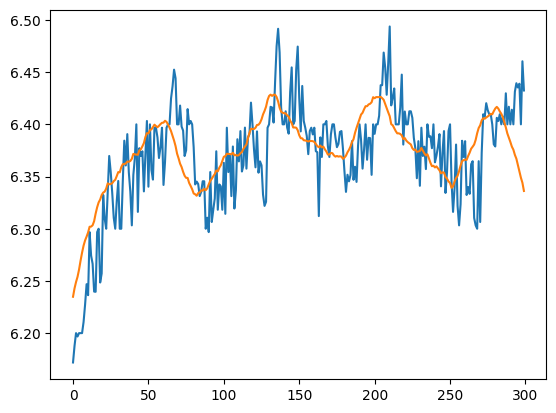

In [166]:
# comparison before / after SMA 10
plt.plot(np.arange(0,300,1), df_raw["dt2"][:300])
plt.plot(np.arange(0,300,1), df_sma["dt2"][:300])

# NOW ALL data looks much smooth
## Lets apply preprocessing and try come predictions

In [167]:
df_to_prep_sma = df_sma.copy()
y_sma = df_sma["dt2"] #.to_numpy().reshape(-1)
X_raw_sma = df_sma.drop(["dt2"], axis=1)
y_sma, X_raw_sma

(0       6.234832
 1       6.242856
 2       6.248954
 3       6.253954
 4       6.260890
           ...   
 7553    5.850426
 7554    5.836743
 7555    5.822272
 7556    5.804757
 7557    5.790444
 Name: dt2, Length: 7558, dtype: float64,
             317       327      QbyIP      QbyI  time_on_power  381  395  396  \
 0     23.192862  5.460984  12.508515  5.628832       1.753043    1    1    0   
 1     23.163689  5.408578  12.507798  5.628509       1.920000    1    1    0   
 2     23.139179  5.358693  12.513670  5.631152       2.086957    1    1    0   
 3     23.119017  5.310069  12.513068  5.630880       2.253913    1    1    0   
 4     23.097243  5.261960  12.510170  5.629576       2.420870    1    1    0   
 ...         ...       ...        ...       ...            ...  ...  ...  ...   
 7553  24.703646  6.364985   9.566515  4.591450    1555.638817    1    1    0   
 7554  24.822680  6.116396   9.566935  4.591651    1555.836140    1    1    0   
 7555  24.964087  5.851118   9.

In [168]:
X_sma = ct.transform(X_raw_sma)

In [169]:
tscv_sma = list(TimeSeriesSplit(n_splits=6).split(X_sma, y_sma))

In [170]:
tm_sma = TrainModel(X_sma, y_sma)

In [171]:
tm_sma.model_comparison(models_list, models, tscv_sma)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.123 +/- 0.020
Root Mean Squared Error: 0.150 +/- 0.023

Evaluating of GBR
Mean Absolute Error:     0.110 +/- 0.021
Root Mean Squared Error: 0.133 +/- 0.023

Evaluating of MLP
Mean Absolute Error:     0.683 +/- 0.647
Root Mean Squared Error: 0.796 +/- 0.728

Evaluating of GBR
Mean Absolute Error:     0.106 +/- 0.025
Root Mean Squared Error: 0.130 +/- 0.031

Evaluating of SGDR
Mean Absolute Error:     0.796 +/- 0.805
Root Mean Squared Error: 0.904 +/- 0.878



In [172]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=128, max_depth=4)

In [173]:
gbr_preds = []

for tr, te in tscv_sma:
    gbr.fit(X_sma[tr], y_sma[tr])
    gbr_preds.append(gbr.predict(X_sma[te]))
    print(gbr.score(X_sma[te], y_sma[te]))

0.012232399852736386
-0.8253021237266491
-1.129730002415779
0.14844126976367622
0.297582991588621
-0.6835632469771904


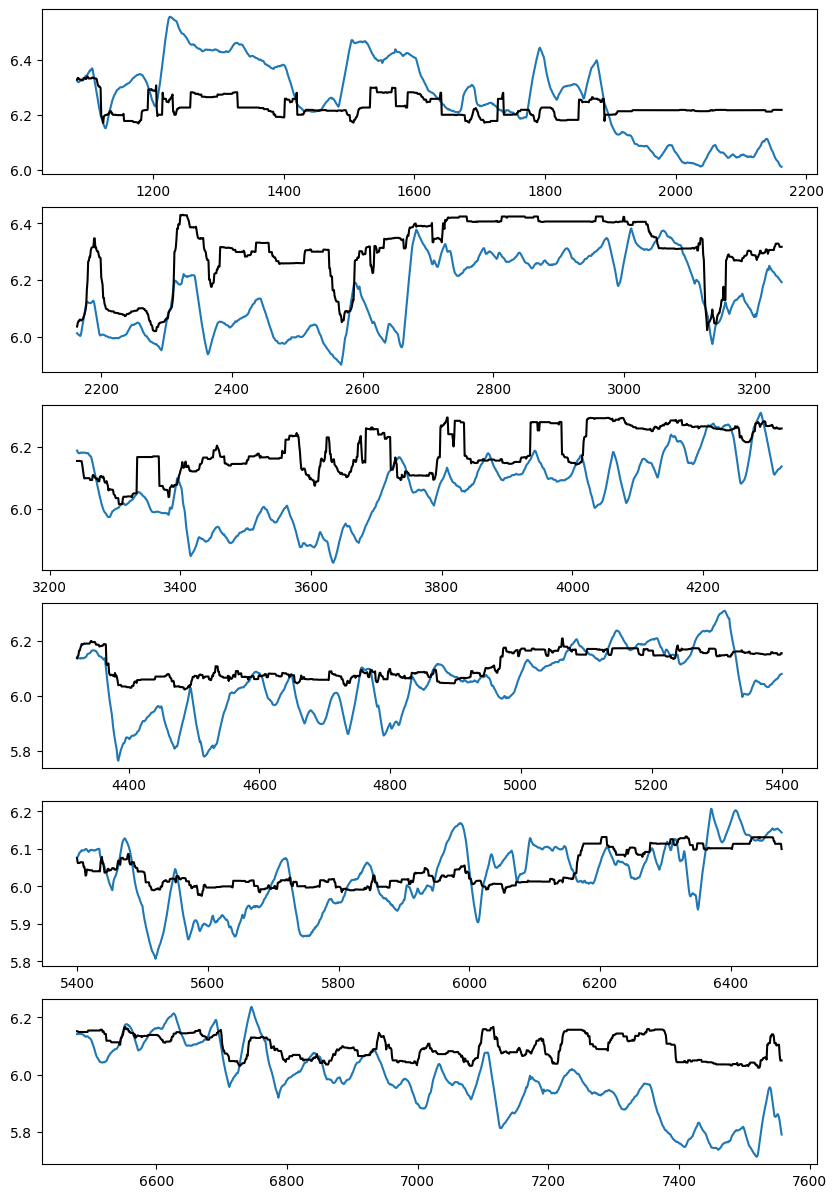

In [174]:
n = 0
fig, axs = plt.subplots(len(tscv_sma), 1, figsize=(10,15))

for i in range(len(tscv_sma)):

    axs[i].plot(tscv_sma[i][1], y_sma[tscv_sma[i][1]])
    axs[i].plot(tscv_sma[i][1], gbr_preds[i], color="black")



# JUST default train_test_split is below
## In this case data shuffles so no time dependensies here

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
y_tr

array([5.9066075 , 6.33712154, 6.03548345, ..., 6.01895169, 6.13823509,
       5.93636339])

In [101]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X_tr, y_tr)

GradientBoostingRegressor()

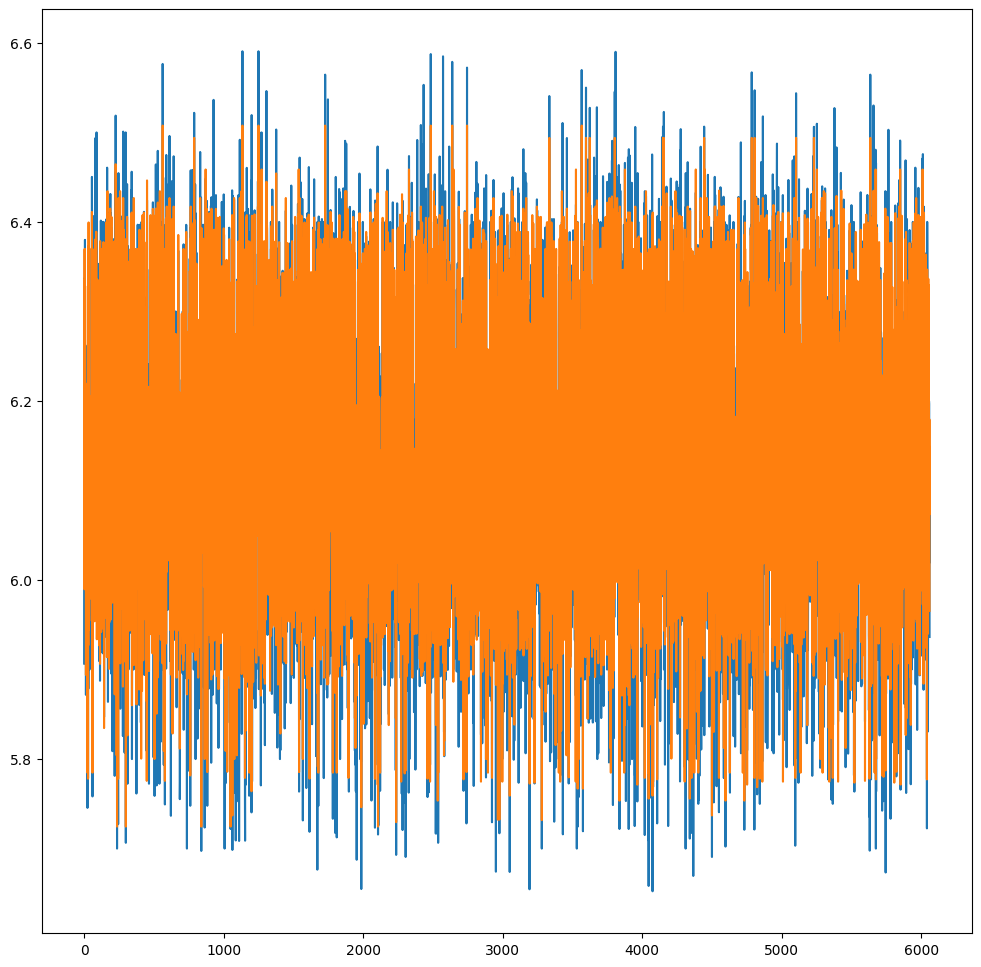

In [102]:

plt.figure(figsize=(12,12))
plt.plot(y_tr)
plt.plot(gbr2.predict(X_tr))

0.871488708740551


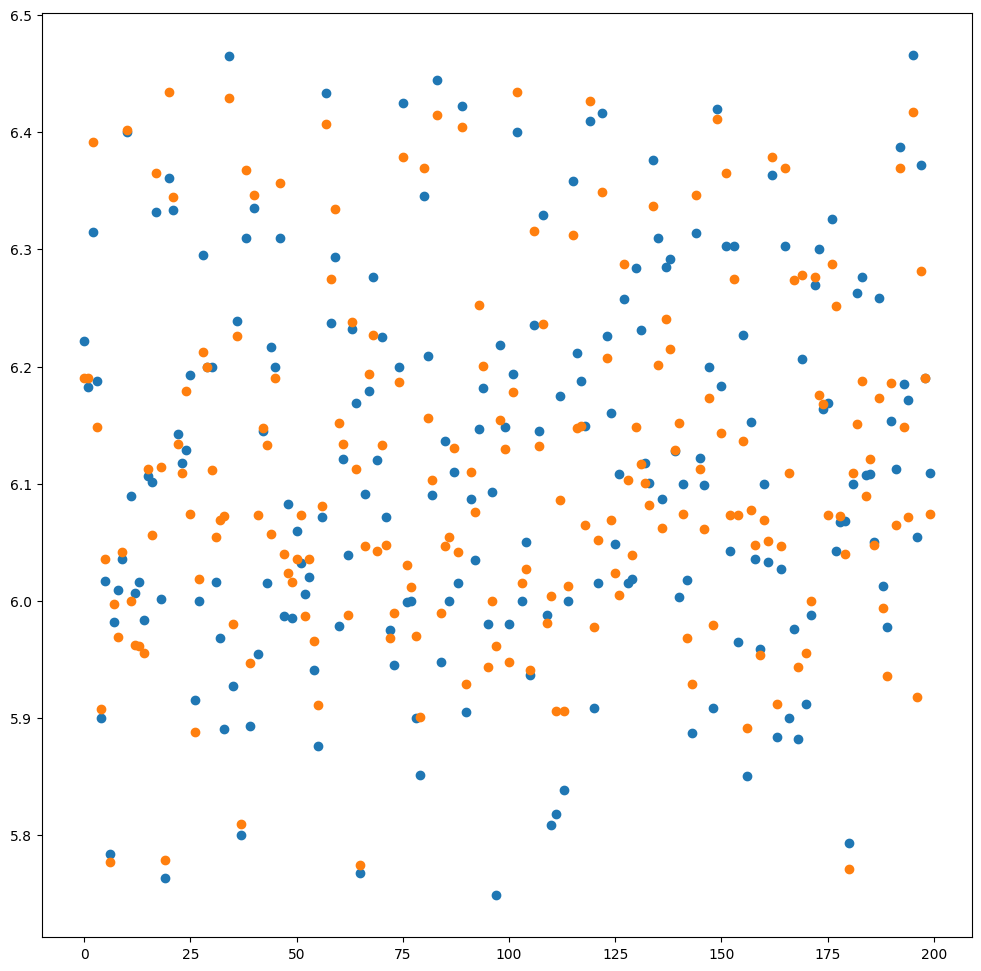

In [103]:
print(gbr2.score(X_te, y_te))
plt.figure(figsize=(12,12))
xplt = np.arange(0,len(y_te), 1)
plt.scatter(xplt[:200], y_te[:200])
plt.scatter(xplt[:200], gbr2.predict(X_te)[:200])

In [109]:
kf = KFold(n_splits=4).split(X,y)
evaluate(gbr, X,y, kf)


Mean Absolute Error:     0.124 +/- 0.016
Root Mean Squared Error: 0.152 +/- 0.019


In [181]:
df_raw

,317,327,381,395,396,QbyIP,QbyI,dt2,time_on_power,season,day_period
0,23.518750,5.851351,1,1,0,12.539633,5.642834,6.171875,0.166957,1,1
1,23.396666,5.780556,1,1,0,12.426728,5.592027,6.187709,0.333913,1,1
2,23.303225,5.681579,1,1,0,12.515100,5.631795,6.200001,0.500870,1,1
3,23.299999,5.674286,1,1,0,12.511896,5.630353,6.196775,0.667826,1,1
4,23.299999,5.631579,1,1,0,12.530030,5.638513,6.200001,0.834783,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7573,25.308823,3.169231,0,1,0,9.573110,4.595093,5.682086,1557.710708,1,0
7574,25.590625,2.961111,0,1,0,9.598048,4.607063,5.673891,1557.908031,1,0
7575,25.826470,2.972973,0,1,0,9.613842,4.614644,5.652317,1558.105354,1,0
7576,26.700001,2.877778,0,1,0,9.486647,4.553591,5.654838,1558.302677,1,0


In [182]:
# lets do manual prediction on trained model

X_manual = pd.DataFrame(
    {
        "317": [24],
        "327": [2],
        "381":[1],
        "395":[1],
        "396":[1],
        "QbyIP": [9], 
        "time_on_power": [1600],
        "season": [1],
        "day_period": [0]
    }
)
    
X_manual

,317,327,381,395,396,QbyIP,time_on_power,season,day_period
0,24,2,1,1,1,9,1600,1,0


In [183]:
X_manual = ct.transform(X_manual)

KeyError: "['QbyI'] not in index"

In [ ]:
X_manual

In [184]:
gbr2.predict(X_manual)

/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 9 features, but GradientBoostingRegressor is expecting 10 features as input.